## Final Project Submission

Please fill out:
* Student name: JUDITH AKELLE WAGUMA
* Student pace: Part Time 
* Scheduled project review date/time: 
* Instructor name: Diana Mong'ina
* Blog post URL:  


# INTRODUCTION

Microsoft is interested in venturing into the world of original movie content and has recently set up a new movie studio. However, as they don't have any prior experience in this field, they require guidance in selecting the right types of films to produce.

To address this issue, I will analyze data on the current box office trends and interpret the insights to advise Microsoft on the types of movies that are performing well and why. This will enable them to make informed decisions on what movies to create in their new studio.

# OBJECTIVE


Objective: 

To identify the types of films that are currently performing best at the box office and provide actionable insights for Microsoft to make informed decisions about the types of films they should create.

Steps to be undertaken:

   >Load all relevant data sets.
   
   >Examine the data to ensure it has been loaded correctly, checking the size, data types, and any missing values.
   
   >Clean the data by removing irrelevant columns or rows, renaming columns, handling missing values, and correcting any errors.
   
   >Merge the relevant data sets to create a master data set.
   
   >Use data analysis to explore the data, looking for trends, patterns, and relationships between variables.
   
   >Use data visualization to present the data in a clear and meaningful way.
   
   >Draw conclusions from the analysis and provide recommendations based on findings.
   
   >Communicate the findings and recommendations to the Microsoft team.



In [401]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import seaborn as sns
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline  

import warnings

warnings.filterwarnings("ignore")

In [402]:
#Opening and Exploring the Data, size

bom_df = pd.read_csv('Data/bom.movie_gross.csv')
bom_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [403]:
#  Identifying which columns have missing data and determining how to handle those missing values.

bom_df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [404]:
# Identifing how the datatypes are related to missing data.

bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [405]:
# Examine the domestic gross data

bom_df.describe().astype(int)

,domestic_gross,year
count,3359,3387
mean,28745845,2013
std,66982498,2
min,100,2010
25%,120000,2012
50%,1400000,2014
75%,27900000,2016
max,936700000,2018


In [406]:
# Examine the year 2010 for the top five trends.

bom_df_2010 = bom_df[(bom_df['year'] == 2010)]

#drop missing data

bom_df_2010 = bom_df_2010.dropna()

In [407]:
# Examine domestic gross for 2010 

bom_df_2010.describe().astype(int)

,domestic_gross,year
count,308,308
mean,32963448,2010
std,60668552,0
min,800,2010
25%,280250,2010
50%,4000000,2010
75%,40400000,2010
max,415000000,2010


By calculating both the mean and median, we get a sense of the central tendency of the domestic gross box office distribution for films released in 2010. In this case the mean and median are close in value, suggesting that the distribution is roughly symmetrical, with no strong outliers.

In [408]:
#Identify year 2010 domestic gross mean and median to understand the performance of films released in year 2010 as a starting point for further analysis

print("Domestic 2010 gross box office mean", 
      bom_df_2010['domestic_gross'].mean())

print("Domestic 2010 gross box office median", 
      bom_df_2010['domestic_gross'].median())


Domestic 2010 gross box office mean 32963448.373376623
Domestic 2010 gross box office median 4000000.0


Examine another year  to compare with 2010. Here I pick 2018 to see difference over greater time period.

In [409]:
bom_df_2018 = bom_df[(bom_df['year'] == 2018)]

bom_df_2018.dropna()

,title,studio,domestic_gross,foreign_gross,year
3079,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
3080,Black Panther,BV,700100000.0,646900000,2018
3081,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000,2018
3082,Incredibles 2,BV,608600000.0,634200000,2018
3083,Aquaman,WB,335100000.0,812700000,2018
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018
3309,Time Freak,Grindstone,10000.0,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018


Here we are getting the statistical summary of the numerical columns in the dataframe bom_df_2018, and then converting the results to integer type. Thereafter we generate a summation of the data of the numbes in columns. 

In [410]:
bom_df_2018.describe().astype(int)

,domestic_gross,year
count,308,308
mean,36010421,2018
std,85733961,0
min,1300,2018
25%,175250,2018
50%,2700000,2018
75%,35950000,2018
max,700100000,2018


Identify year 2018 domestic gross mean and median. Compare to 2010 mean and median. This code helps to provide useful summary statistics for the domestic_gross column and help give an idea of the typical box office performance of movies released in 2018. The results therefore suggests that there were some movies that performed exceptionally well and brought up the mean, while most movies had lower domestic gross earnings.

In [411]:
print("Domestic 2018 gross box office mean", 
      bom_df_2018['domestic_gross'].mean())

print("Domestic 2018 gross box office median", 
      bom_df_2018['domestic_gross'].median())

Domestic 2018 gross box office mean 36010421.75
Domestic 2018 gross box office median 2700000.0


### Exploring the Second Dataset 

In [412]:
mov_budgets_df =  pd.read_csv('Data/tn.movie_budgets.csv')
mov_budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [413]:
mov_budgets_df[:10]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [414]:
mov_budgets_df.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [415]:
#represents the number of rows and columns
mov_budgets_df.shape

(5782, 6)

In [416]:
#Identify any missing data
mov_budgets_df.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [417]:
mov_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


## Exploring the Third Data Set

In [418]:
conn = sqlite3.connect('Data/im.db')
pd.read_sql("""SELECT *
                     FROM movie_ratings;""", conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [419]:
movie_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


This code reads in all the columns from the movie_basics table in the im.db database using SQL query and saves the resulting DataFrame in the variable movie_basics_df. 

In [420]:
# Identify data for movie_basics 

movie_basics_df = pd.read_sql("""SELECT * FROM movie_basics;""", conn)

movie_basics_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [421]:
movie_basics_df.head(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


In [422]:
movie_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [423]:
# Examine and identify data types for movie_akas table

movie_akas_df = pd.read_sql("""SELECT * FROM movie_akas;""", conn)

movie_akas_df.head()

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


In [424]:
movie_akas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [425]:
# Merge individual imdb tables into one dataframe using movie_id 

imdb_df = pd.merge(pd.merge(
    movie_basics_df, movie_ratings_df,on='movie_id'),
    movie_akas_df, on='movie_id').drop_duplicates(subset = 'movie_id')

imdb_df = imdb_df.reset_index(drop = True)

imdb_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,ordering,title,region,language,types,attributes,is_original_title
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,1,Sangharsh,IN,hi,None,alternative transliteration,0.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,1,One Day Before the Rainy Season,XWW,en,None,None,0.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,10,La otra cara del viento,VE,None,None,None,0.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13,1,Subse Bada Sukh,IN,bn,None,None,0.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,1,La Telenovela Errante,None,None,original,None,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69572,tt9899860,Watching This Movie Is a Crime,Didan in film jorm ast,2019,100.0,"Drama,Thriller",8.1,7,1,Watching This Movie Is a Crime,XWW,en,imdbDisplay,None,0.0
69573,tt9899880,Columbus,Columbus,2018,85.0,Comedy,5.8,5,1,Columbus,None,None,original,None,1.0
69574,tt9903952,BADMEN with a good behavior,BADMEN with a good behavior,2018,87.0,"Comedy,Horror",9.2,5,1,BADMEN with a good behavior,DE,None,None,None,0.0
69575,tt9905462,Pengalila,Pengalila,2019,111.0,Drama,8.4,600,1,Pengalila,None,None,original,None,1.0


In [426]:
imdb_df.isna().sum()

movie_id                 0
primary_title            0
original_title           0
start_year               0
runtime_minutes       6747
genres                 640
averagerating            0
numvotes                 0
ordering                 0
title                    0
region               11444
language             63871
types                45395
attributes           67562
is_original_title        0
dtype: int64

### Merge DataFames

In [427]:
All_movies_df = pd.merge(bom_df, movie_budgets_df, left_on='title', right_on='movie')

All_movies_df.columns

Index(['title', 'studio', 'domestic_gross_x', 'foreign_gross', 'year', 'id',
       'release_date', 'movie', 'production_budget', 'domestic_gross_y',
       'worldwide_gross'],
      dtype='object')

In [428]:
#drop column 'movie', keep 'title' as the primary key

All_movies_df.drop('movie', axis=1, inplace=True)

In [429]:
All_movies_df.head()

,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000,2010,47,"Jun 18, 2010","$200,000,000","$415,004,880","$1,068,879,522"
1,Inception,WB,292600000.0,535700000,2010,38,"Jul 16, 2010","$160,000,000","$292,576,195","$835,524,642"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,27,"May 21, 2010","$165,000,000","$238,736,787","$756,244,673"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,53,"Jun 30, 2010","$68,000,000","$300,531,751","$706,102,828"
4,Iron Man 2,Par.,312400000.0,311500000,2010,15,"May 7, 2010","$170,000,000","$312,433,331","$621,156,389"


In [433]:
# Drop following columns: 'id', 'ordering', 'language', 'types',
# 'attributes', 'is_original-title'

Merged_df.drop(['id', 'ordering_x', 'language_y', 'types_x', 
               'attributes_x', 'is_original_title_x', 'region_x', 'start_year_y'], 
              axis=1, inplace = True)


In [431]:
Merged_df.columns

Index(['title_x', 'studio', 'domestic_gross_x', 'foreign_gross', 'year', 'id',
       'release_date', 'production_budget', 'domestic_gross_y',
       'worldwide_gross', 'movie_id_x', 'primary_title_x', 'original_title_x',
       'start_year_x', 'runtime_minutes_x', 'genres_x', 'averagerating_x',
       'numvotes_x', 'ordering_x', 'title_y', 'region_x', 'language_x',
       'types_x', 'attributes_x', 'is_original_title_x', 'movie_id_y',
       'primary_title_y', 'original_title_y', 'start_year_y',
       'runtime_minutes_y', 'genres_y', 'averagerating_y', 'numvotes_y',
       'ordering_y', 'title', 'region_y', 'language_y', 'types_y',
       'attributes_y', 'is_original_title_y'],
      dtype='object')

In [434]:
#Cleaning the Data

Merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2108 entries, 0 to 2107
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title_x              2108 non-null   object 
 1   studio               2108 non-null   object 
 2   domestic_gross_x     2107 non-null   float64
 3   foreign_gross        1772 non-null   object 
 4   year                 2108 non-null   int64  
 5   release_date         2108 non-null   object 
 6   production_budget    2108 non-null   object 
 7   domestic_gross_y     2108 non-null   object 
 8   worldwide_gross      2108 non-null   object 
 9   movie_id_x           2108 non-null   object 
 10  primary_title_x      2108 non-null   object 
 11  original_title_x     2108 non-null   object 
 12  start_year_x         2108 non-null   int64  
 13  runtime_minutes_x    2032 non-null   float64
 14  genres_x             2089 non-null   object 
 15  averagerating_x      2108 non-null   f

In [435]:
#Looking for missing data

Merged_df.isna().sum() 

title_x                   0
studio                    0
domestic_gross_x          1
foreign_gross           336
year                      0
release_date              0
production_budget         0
domestic_gross_y          0
worldwide_gross           0
movie_id_x                0
primary_title_x           0
original_title_x          0
start_year_x              0
runtime_minutes_x        76
genres_x                 19
averagerating_x           0
numvotes_x                0
title_y                   0
language_x             1855
movie_id_y                0
primary_title_y           0
original_title_y          0
runtime_minutes_y        76
genres_y                 19
averagerating_y           0
numvotes_y                0
ordering_y                0
title                     0
region_y                204
types_y                 825
attributes_y           2033
is_original_title_y       0
dtype: int64

In [437]:
Merged_df.drop(['ordering_y', 'language_x', 'types_y', 
               'attributes_y', 'is_original_title_y', 'region_y', 'start_year_x'], 
              axis=1, inplace = True)


In [144]:
Merged_df

,title_x,studio,domestic_gross_x,foreign_gross,year,release_date,production_budget,domestic_gross_y,worldwide_gross,movie_id,primary_title,original_title,runtime_minutes,genres,averagerating,numvotes,title_y
0,Toy Story 3,BV,415000000.0,652000000,2010,"Jun 18, 2010","$200,000,000","$415,004,880","$1,068,879,522",tt0435761,Toy Story 3,Toy Story 3,103.0,"Adventure,Animation,Comedy",8.3,682218,Η ιστορία των παιχνιδιών 3
1,Inception,WB,292600000.0,535700000,2010,"Jul 16, 2010","$160,000,000","$292,576,195","$835,524,642",tt1375666,Inception,Inception,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,Începutul
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,"May 21, 2010","$165,000,000","$238,736,787","$756,244,673",tt0892791,Shrek Forever After,Shrek Forever After,93.0,"Adventure,Animation,Comedy",6.3,167532,Shrek nüüd ja igavesti
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,"Jun 30, 2010","$68,000,000","$300,531,751","$706,102,828",tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,124.0,"Adventure,Drama,Fantasy",5.0,211733,The Twilight Saga: Eclipse
4,Iron Man 2,Par.,312400000.0,311500000,2010,"May 7, 2010","$170,000,000","$312,433,331","$621,156,389",tt1228705,Iron Man 2,Iron Man 2,124.0,"Action,Adventure,Sci-Fi",7.0,657690,Homem de Ferro 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393,Gotti,VE,4300000.0,NaN,2018,"Jun 15, 2018","$10,000,000","$4,286,367","$6,089,100",tt1801552,Gotti,Gotti,112.0,"Biography,Crime,Drama",4.8,10358,Готи
1394,Bilal: A New Breed of Hero,VE,491000.0,1700000,2018,"Feb 2, 2018","$30,000,000","$490,973","$648,599",tt3576728,Bilal: A New Breed of Hero,Bilal: A New Breed of Hero,105.0,"Action,Adventure,Animation",8.0,16854,Bilal: A Lenda
1395,Mandy,RLJ,1200000.0,NaN,2018,"Sep 14, 2018","$6,000,000","$1,214,525","$1,427,656",tt4995858,Mandy,Mandy,113.0,"Drama,Thriller",4.1,39,Mandy
1396,Mandy,RLJ,1200000.0,NaN,2018,"Sep 14, 2018","$6,000,000","$1,214,525","$1,427,656",tt6998518,Mandy,Mandy,121.0,"Action,Fantasy,Horror",6.6,44378,Mandy


In [439]:
#Keep title_x and drop duplicate column movie titles

Merged_df.drop(['title_y', 'primary_title_x', 'original_title_x'], axis=1, inplace = True)

In [441]:
#drop 'movie_id', use Major_df index for new id

Merged_df.drop(['movie_id_y'], axis = 1, inplace = True)

In [443]:
Merged_df.columns

Index(['title_x', 'studio', 'domestic_gross_x', 'foreign_gross', 'year',
       'release_date', 'production_budget', 'domestic_gross_y',
       'worldwide_gross', 'movie_id_x', 'runtime_minutes_x', 'genres_x',
       'averagerating_x', 'numvotes_x', 'primary_title_y', 'original_title_y',
       'runtime_minutes_y', 'genres_y', 'averagerating_y', 'numvotes_y',
       'title'],
      dtype='object')

In [444]:
Merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2108 entries, 0 to 2107
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title_x            2108 non-null   object 
 1   studio             2108 non-null   object 
 2   domestic_gross_x   2107 non-null   float64
 3   foreign_gross      1772 non-null   object 
 4   year               2108 non-null   int64  
 5   release_date       2108 non-null   object 
 6   production_budget  2108 non-null   object 
 7   domestic_gross_y   2108 non-null   object 
 8   worldwide_gross    2108 non-null   object 
 9   movie_id_x         2108 non-null   object 
 10  runtime_minutes_x  2032 non-null   float64
 11  genres_x           2089 non-null   object 
 12  averagerating_x    2108 non-null   float64
 13  numvotes_x         2108 non-null   int64  
 14  primary_title_y    2108 non-null   object 
 15  original_title_y   2108 non-null   object 
 16  runtime_minutes_y  2032 

In [445]:
#convert production budget to integer datatype 

Merged_df["production_budget"] = Merged_df["production_budget"].replace(
    "[$,]", "", regex=True).astype(int)

In [446]:
#convert domestic gross and worldwide gross to integer datatype
Merged_df["domestic_gross_y"] = Merged_df["domestic_gross_y"].replace(
    "[$,]", "", regex=True).astype(int)

Merged_df["worldwide_gross"] = Merged_df["worldwide_gross"].replace(
    "[$,]", "", regex=True).astype(int)

In [447]:
# Ascertain data types for further exploration
Merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2108 entries, 0 to 2107
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title_x            2108 non-null   object 
 1   studio             2108 non-null   object 
 2   domestic_gross_x   2107 non-null   float64
 3   foreign_gross      1772 non-null   object 
 4   year               2108 non-null   int64  
 5   release_date       2108 non-null   object 
 6   production_budget  2108 non-null   int64  
 7   domestic_gross_y   2108 non-null   int64  
 8   worldwide_gross    2108 non-null   int64  
 9   movie_id_x         2108 non-null   object 
 10  runtime_minutes_x  2032 non-null   float64
 11  genres_x           2089 non-null   object 
 12  averagerating_x    2108 non-null   float64
 13  numvotes_x         2108 non-null   int64  
 14  primary_title_y    2108 non-null   object 
 15  original_title_y   2108 non-null   object 
 16  runtime_minutes_y  2032 

In [450]:
#Examine the summary data on runtime_minutes_x,

Merged_df['runtime_minutes_x'].describe()

count    2032.000000
mean      104.995079
std        20.914211
min         3.000000
25%        92.000000
50%       103.000000
75%       117.000000
max       192.000000
Name: runtime_minutes_x, dtype: float64

In [453]:
#Use median to replace missing data in runtime_minutes

Merged_df['runtime_minutes_x'] = Merged_df['runtime_minutes_x'].fillna(
    Merged_df['runtime_minutes_x'].median())


In [456]:
# Looking at the issing values in the 'genres_x' column of the DataFrame 'Merged_df' with the string 'missing.
#This modifies the original DataFrame in place.

Merged_df['genres_x'] = Merged_df['genres_x'].fillna('missing')

In [457]:
# Ensure all missing data is accounted for. 

Merged_df.isna().sum()

title_x                0
studio                 0
domestic_gross_x       1
foreign_gross        336
year                   0
release_date           0
production_budget      0
domestic_gross_y       0
worldwide_gross        0
movie_id_x             0
runtime_minutes_x      0
genres_x               0
averagerating_x        0
numvotes_x             0
primary_title_y        0
original_title_y       0
runtime_minutes_y     76
genres_y              19
averagerating_y        0
numvotes_y             0
title                  0
dtype: int64

In [459]:
#convert release date into month released only

Merged_df['release_date'].dtypes

dtype('O')

In [460]:
#convert the 'release_date' column to a datetime data type.

Merged_df['release_date'] = pd.to_datetime(Merged_df['release_date'])

Merged_df['release_date'].head()

0   2010-06-18
1   2010-07-16
2   2010-05-21
3   2010-06-30
4   2010-05-07
Name: release_date, dtype: datetime64[ns]

In [461]:
# Create a month released column by month name and month number.

Merged_df['month_released'] = pd.to_datetime(Merged_df['release_date']).dt.month_name()

Merged_df['month_num'] = pd.to_datetime(Merged_df['release_date']).dt.month

Merged_df.columns

Index(['title_x', 'studio', 'domestic_gross_x', 'foreign_gross', 'year',
       'release_date', 'production_budget', 'domestic_gross_y',
       'worldwide_gross', 'movie_id_x', 'runtime_minutes_x', 'genres_x',
       'averagerating_x', 'numvotes_x', 'primary_title_y', 'original_title_y',
       'runtime_minutes_y', 'genres_y', 'averagerating_y', 'numvotes_y',
       'title', 'month_released', 'month_num'],
      dtype='object')

In [462]:
# Drop release date and keep months released now.

Merged_df.drop(['release_date'], axis = 1, inplace = True)

In [463]:
Merged_df.columns

Index(['title_x', 'studio', 'domestic_gross_x', 'foreign_gross', 'year',
       'production_budget', 'domestic_gross_y', 'worldwide_gross',
       'movie_id_x', 'runtime_minutes_x', 'genres_x', 'averagerating_x',
       'numvotes_x', 'primary_title_y', 'original_title_y',
       'runtime_minutes_y', 'genres_y', 'averagerating_y', 'numvotes_y',
       'title', 'month_released', 'month_num'],
      dtype='object')

In [464]:
Merged_df.rename(columns = {'title_x': 'Movie_Title', 
                           'domestic_gross_y': 'domestic_gross'}, inplace = True)

print(Merged_df.columns)

Index(['Movie_Title', 'studio', 'domestic_gross_x', 'foreign_gross', 'year',
       'production_budget', 'domestic_gross', 'worldwide_gross', 'movie_id_x',
       'runtime_minutes_x', 'genres_x', 'averagerating_x', 'numvotes_x',
       'primary_title_y', 'original_title_y', 'runtime_minutes_y', 'genres_y',
       'averagerating_y', 'numvotes_y', 'title', 'month_released',
       'month_num'],
      dtype='object')


In [465]:
#simply the difference between the worldwide gross and the domestic gross

Merged_df['foreign_gross'] = Merged_df['worldwide_gross'] - Merged_df['domestic_gross']

Merged_df['foreign_gross'].head()

0    653874642
1    542948447
2    517507886
3    405571077
4    308723058
Name: foreign_gross, dtype: int64

In [466]:
#Show the movie titles and their corresponding production percentages in the first few rows of the DataFrame.

Merged_df['production_percent'] = (Merged_df['production_budget'] / 
                                  Merged_df['worldwide_gross'])* 100

Merged_df[['Movie_Title', 'production_percent']].head()

,Movie_Title,production_percent
0,Toy Story 3,18.711183
1,Inception,19.149645
2,Shrek Forever After,21.818336
3,The Twilight Saga: Eclipse,9.630325
4,Iron Man 2,27.368309


In [467]:
Merged_df

,Movie_Title,studio,domestic_gross_x,foreign_gross,year,production_budget,domestic_gross,worldwide_gross,movie_id_x,runtime_minutes_x,...,primary_title_y,original_title_y,runtime_minutes_y,genres_y,averagerating_y,numvotes_y,title,month_released,month_num,production_percent
0,Toy Story 3,BV,415000000.0,653874642,2010,200000000,415004880,1068879522,tt0435761,103.0,...,Toy Story 3,Toy Story 3,103.0,"Adventure,Animation,Comedy",8.3,682218,Η ιστορία των παιχνιδιών 3,June,6,18.711183
1,Inception,WB,292600000.0,542948447,2010,160000000,292576195,835524642,tt1375666,148.0,...,Inception,Inception,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,Începutul,July,7,19.149645
2,Shrek Forever After,P/DW,238700000.0,517507886,2010,165000000,238736787,756244673,tt0892791,93.0,...,Shrek Forever After,Shrek Forever After,93.0,"Adventure,Animation,Comedy",6.3,167532,Shrek nüüd ja igavesti,May,5,21.818336
3,The Twilight Saga: Eclipse,Sum.,300500000.0,405571077,2010,68000000,300531751,706102828,tt1325004,124.0,...,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,124.0,"Adventure,Drama,Fantasy",5.0,211733,The Twilight Saga: Eclipse,June,6,9.630325
4,Iron Man 2,Par.,312400000.0,308723058,2010,170000000,312433331,621156389,tt1228705,124.0,...,Iron Man 2,Iron Man 2,124.0,"Action,Adventure,Sci-Fi",7.0,657690,Homem de Ferro 2,May,5,27.368309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2103,Mandy,RLJ,1200000.0,213131,2018,6000000,1214525,1427656,tt4995858,113.0,...,Mandy,Mandy,113.0,"Drama,Thriller",4.1,39,Mandy,September,9,420.269309
2104,Mandy,RLJ,1200000.0,213131,2018,6000000,1214525,1427656,tt4995858,113.0,...,Mandy,Mandy,121.0,"Action,Fantasy,Horror",6.6,44378,Mandy,September,9,420.269309
2105,Mandy,RLJ,1200000.0,213131,2018,6000000,1214525,1427656,tt6998518,121.0,...,Mandy,Mandy,113.0,"Drama,Thriller",4.1,39,Mandy,September,9,420.269309
2106,Mandy,RLJ,1200000.0,213131,2018,6000000,1214525,1427656,tt6998518,121.0,...,Mandy,Mandy,121.0,"Action,Fantasy,Horror",6.6,44378,Mandy,September,9,420.269309


In [468]:
# removing resulting duplicate entries in the 'Movie_Title' column.

Merged_df = Merged_df.drop_duplicates(subset= 'Movie_Title', keep="first", ignore_index = True)

### Data Analysis

Here I would like to narrow my focus on the questions of what is the best performing movies, and look at the data related to production costs and identify relationship to domestic revenue and worldwide revenue. Consider whether the median cost to produce a movies has changed over times. Identify key movie attributes that may lead to box office success.

In [469]:
#Sort dataframe by worldwide gross

Merged_df = Merged_df.sort_values(by = 'worldwide_gross', ascending = False, 
                                ignore_index = True)

Merged_df.head()

,Movie_Title,studio,domestic_gross_x,foreign_gross,year,production_budget,domestic_gross,worldwide_gross,movie_id_x,runtime_minutes_x,...,primary_title_y,original_title_y,runtime_minutes_y,genres_y,averagerating_y,numvotes_y,title,month_released,month_num,production_percent
0,Avengers: Infinity War,BV,678800000.0,1369318718,2018,300000000,678815482,2048134200,tt4154756,149.0,...,Avengers: Infinity War,Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi",8.5,670926,Avengers: Infinity War,April,4,14.647478
1,Jurassic World,Uni.,652300000.0,996584239,2015,215000000,652270625,1648854864,tt0369610,124.0,...,Jurassic World,Jurassic World,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Джурасик свят,June,6,13.039353
2,Furious 7,Uni.,353000000.0,1165715774,2015,190000000,353007020,1518722794,tt2820852,137.0,...,Furious 7,Furious Seven,137.0,"Action,Crime,Thriller",7.2,335074,Furious 7,April,4,12.510512
3,Avengers: Age of Ultron,BV,459000000.0,944008095,2015,330600000,459005868,1403013963,tt2395427,141.0,...,Avengers: Age of Ultron,Avengers: Age of Ultron,141.0,"Action,Adventure,Sci-Fi",7.3,665594,Qisasçilar 2,May,5,23.563557
4,Black Panther,BV,700100000.0,648198658,2018,200000000,700059566,1348258224,tt1825683,134.0,...,Black Panther,Black Panther,134.0,"Action,Adventure,Sci-Fi",7.3,516148,Чорна Пантера,February,2,14.833954


In [470]:
# slices the data to keep only the first 1000 rows.

Merged_df = Merged_df[:1000]


In [471]:
#Identify top 50 films of each year

df_2010 = Merged_df[Merged_df['year'] == 2010][:50]

df_2011 = Merged_df[Merged_df['year'] == 2011][:50]

df_2012 = Merged_df[Merged_df['year'] == 2012][:50]

df_2013 = Merged_df[Merged_df['year'] == 2013][:50]

df_2014 = Merged_df[Merged_df['year'] == 2014][:50]

df_2015 = Merged_df[Merged_df['year'] == 2015][:50]

df_2016 = Merged_df[Merged_df['year'] == 2016][:50]

df_2017 = Merged_df[Merged_df['year'] == 2017][:50]

df_2018 = Merged_df[Merged_df['year'] == 2018][:50]

# Concatenate each movie year dataframe into one dataframe

top_df = pd.concat([df_2010, df_2011, df_2012, df_2013, 
           df_2014, df_2015, df_2016, df_2017, 
           df_2018])

top_df = top_df.reset_index(drop = True)

In [478]:
# Sort top 50 movies of each year by worldwide gross revenue

top_df = top_df.sort_values(by = 'worldwide_gross', ascending = False, 
                                ignore_index = True)

# Compare top 50 from each year to overall Merged_df

top_df.describe().astype(int)

,domestic_gross_x,foreign_gross,year,production_budget,domestic_gross,worldwide_gross,runtime_minutes_x,averagerating_x,numvotes_x,runtime_minutes_y,averagerating_y,numvotes_y,month_num,production_percent
count,450,450,450,450,450,450,450,450,450,447,450,450,450,450
mean,131524074,221350670,2014,93217777,132092268,353442938,114,6,238271,114,6,238271,7,31
std,105787307,204594244,2,67813267,105363308,294687399,19,0,223018,19,0,223018,3,21
min,25400,16100000,2010,3000000,8178001,73866088,50,2,6,50,2,6,1,1
25%,62525000,80887642,2012,40000000,63573607,153155012,99,6,89821,99,6,89821,5,17
50%,100200000,140218880,2014,75000000,100269433,238949263,111,6,167485,112,6,167485,7,26
75%,162950000,291295377,2016,140000000,162946882,443582754,127,7,329702,127,7,329702,11,39
max,700100000,1369318718,2018,410600000,700059566,2048134200,180,8,1841066,180,8,1841066,12,127


In [479]:
Merged_df.describe().astype(int)

,domestic_gross_x,foreign_gross,year,production_budget,domestic_gross,worldwide_gross,runtime_minutes_x,averagerating_x,numvotes_x,runtime_minutes_y,averagerating_y,numvotes_y,month_num,production_percent
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,994,1000,1000,1000,1000
mean,72688777,111094440,2013,55175687,73003308,184097749,109,6,148692,109,6,148692,6,53
std,89708864,170136094,2,58847075,89614462,250937074,18,0,180032,18,0,180032,3,59
min,1000,0,2010,100000,0,7313697,41,1,5,41,1,5,1,0
25%,18250000,14720873,2012,15000000,18483036,36273038,97,5,39218,97,5,39218,4,20
50%,42650000,42931359,2014,35000000,42901464,88891097,107,6,87271,107,6,87271,7,36
75%,88725000,121575026,2016,70000000,89144532,216720435,120,7,190852,120,7,190852,10,61
max,700100000,1369318718,2018,410600000,700059566,2048134200,180,8,1841066,180,8,1841066,12,624


In [480]:
# Print median of production costs Top 50 per year and # Compare top 50 from each year to overall Merged_df. 


print("The median production cost for Merged_df is USD", 
      Merged_df['production_budget'].median())
print("The median production cost for top_df is USD", 
      top_df['production_budget'].median())

# Domestic gross median compare

print("The median domestic gross for Merged_df is USD", 
      Merged_df['domestic_gross'].median())
print("The median domestic_gross for top_df is USD", 
      top_df['domestic_gross'].median())

# Worldwide gross compare

print("The median worldwide gross for Merged_df is USD", 
      Merged_df['worldwide_gross'].median())
print("The median worldwide gross for top_df is USD", 
      top_df['worldwide_gross'].median())

The median production cost for Merged_df is USD 35000000.0
The median production cost for top_df is USD 75000000.0
The median domestic gross for Merged_df is USD 42901464.5
The median domestic_gross for top_df is USD 100269433.5
The median worldwide gross for Merged_df is USD 88891097.0
The median worldwide gross for top_df is USD 238949263.0


In [481]:
# Identify the skewness of the dataset for the top 50 films per year. 

print("The mean production costs for top_df is USD", 
      int(round(top_df['production_budget'].mean())))

print("The mean worldwide gross for top_df is USD", 
      int(round(top_df['domestic_gross'].mean())))


The mean production costs for top_df is USD 93217778
The mean worldwide gross for top_df is USD 132092268


In [482]:
#Analysis 

top_df[:5]

,Movie_Title,studio,domestic_gross_x,foreign_gross,year,production_budget,domestic_gross,worldwide_gross,movie_id_x,runtime_minutes_x,...,primary_title_y,original_title_y,runtime_minutes_y,genres_y,averagerating_y,numvotes_y,title,month_released,month_num,production_percent
0,Avengers: Infinity War,BV,678800000.0,1369318718,2018,300000000,678815482,2048134200,tt4154756,149.0,...,Avengers: Infinity War,Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi",8.5,670926,Avengers: Infinity War,April,4,14.647478
1,Jurassic World,Uni.,652300000.0,996584239,2015,215000000,652270625,1648854864,tt0369610,124.0,...,Jurassic World,Jurassic World,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Джурасик свят,June,6,13.039353
2,Furious 7,Uni.,353000000.0,1165715774,2015,190000000,353007020,1518722794,tt2820852,137.0,...,Furious 7,Furious Seven,137.0,"Action,Crime,Thriller",7.2,335074,Furious 7,April,4,12.510512
3,Avengers: Age of Ultron,BV,459000000.0,944008095,2015,330600000,459005868,1403013963,tt2395427,141.0,...,Avengers: Age of Ultron,Avengers: Age of Ultron,141.0,"Action,Adventure,Sci-Fi",7.3,665594,Qisasçilar 2,May,5,23.563557
4,Black Panther,BV,700100000.0,648198658,2018,200000000,700059566,1348258224,tt1825683,134.0,...,Black Panther,Black Panther,134.0,"Action,Adventure,Sci-Fi",7.3,516148,Чорна Пантера,February,2,14.833954


In [486]:
Merged_df.query("74000000 < production_budget < 76000000")


,Movie_Title,studio,domestic_gross_x,foreign_gross,year,production_budget,domestic_gross,worldwide_gross,movie_id_x,runtime_minutes_x,...,primary_title_y,original_title_y,runtime_minutes_y,genres_y,averagerating_y,numvotes_y,title,month_released,month_num,production_percent
20,Despicable Me 3,Uni.,264600000.0,770103450,2017,75000000,264624300,1034727750,tt3469046,89.0,...,Despicable Me 3,Despicable Me 3,89.0,"Adventure,Animation,Comedy",6.3,92580,Cattivissimo me 3,June,6,7.248283
29,The Secret Life of Pets,Uni.,368400000.0,518366204,2016,75000000,368384330,886750534,tt2709768,87.0,...,The Secret Life of Pets,The Secret Life of Pets,87.0,"Adventure,Animation,Comedy",6.5,161997,Tajný život maznáčikov,July,7,8.457847
70,Sing,Uni.,270400000.0,364125744,2016,75000000,270329045,634454789,tt3470600,108.0,...,Sing,Sing,108.0,"Animation,Comedy,Family",7.1,115951,Dau Truong Am Nhac,December,12,11.821173
151,Now You See Me,LG/S,117700000.0,225045211,2013,75000000,117723989,342769200,tt1670345,115.0,...,Now You See Me,Now You See Me,115.0,"Crime,Mystery,Thriller",7.3,553156,Truque de Mestre,May,5,21.880612
199,Grown Ups,Sony,162000000.0,110222244,2010,75000000,162001186,272223430,tt1375670,102.0,...,Grown Ups,Grown Ups,102.0,Comedy,6.0,210377,Lake House,June,6,27.550898
244,Inferno,Sony,34300000.0,185175793,2016,75000000,34343574,219519367,tt1686470,100.0,...,Inferno,Giao lo dinh menh,100.0,Thriller,6.3,50,Giao lo dinh menh,October,10,34.165550
259,Immortals,Rela.,83500000.0,128058418,2011,75000000,83504017,211562435,tt1253864,110.0,...,Immortals,Immortals,110.0,"Action,Drama,Fantasy",6.0,152992,Inmortales,November,11,35.450528
471,Killers,LGF,47100000.0,48512786,2010,75000000,47059963,95572749,tt1103153,100.0,...,Killers,Killers,100.0,"Action,Comedy,Romance",5.4,82237,Amame o muérete,June,6,78.474252
497,Sucker Punch,WB,36400000.0,53365887,2011,75000000,36392502,89758389,tt0978764,110.0,...,Sucker Punch,Sucker Punch,110.0,"Action,Adventure,Fantasy",6.1,218371,Sucker Punch,March,3,83.557649


In [487]:
Merged_df.query("100000000 < domestic_gross < 101000000")

,Movie_Title,studio,domestic_gross_x,foreign_gross,year,production_budget,domestic_gross,worldwide_gross,movie_id_x,runtime_minutes_x,...,primary_title_y,original_title_y,runtime_minutes_y,genres_y,averagerating_y,numvotes_y,title,month_released,month_num,production_percent
119,Kingsman: The Golden Circle,Fox,100200000.0,308568858,2017,104000000,100234838,408803696,tt4649466,141.0,...,Kingsman: The Golden Circle,Kingsman: The Golden Circle,141.0,"Action,Adventure,Comedy",6.8,230797,Kingsman: El círculo de oro,September,9,25.440083
134,Fifty Shades Freed,Uni.,100400000.0,270942859,2018,55000000,100407760,371350619,tt4477536,105.0,...,Fifty Shades Freed,Fifty Shades Freed,105.0,"Drama,Romance,Thriller",4.5,43893,Fifty Shades Freed,February,2,14.810801
136,Edge of Tomorrow,WB,100200000.0,270335000,2014,178000000,100206256,370541256,tt1631867,113.0,...,Edge of Tomorrow,Edge of Tomorrow,113.0,"Action,Sci-Fi",7.9,546284,Homse piiril,June,6,48.037836
251,Bad Teacher,Sony,100300000.0,115156141,2011,19000000,100292856,215448997,tt1284575,92.0,...,Bad Teacher,Bad Teacher,92.0,"Comedy,Romance",5.7,181189,Malas enseñanzas,June,6,8.818793
258,Due Date,WB,100500000.0,111200000,2010,65000000,100539043,211739043,tt1231583,95.0,...,Due Date,Due Date,95.0,"Adventure,Comedy",6.5,303523,"Μη σπρώχνεις, έρχομαι",November,11,30.698165
267,Yogi Bear,WB,100200000.0,104528679,2010,80000000,100246011,204774690,tt1302067,80.0,...,Yogi Bear,Yogi Bear,80.0,"Adventure,Animation,Comedy",4.6,18934,El oso Yogi: La película,December,12,39.067328
268,Arrival,Par.,100500000.0,102581755,2016,47000000,100546139,203127894,tt2543164,116.0,...,Arrival,Arrival,116.0,"Drama,Mystery,Sci-Fi",7.9,515483,Η άφιξη,November,11,23.138132
375,A Wrinkle in Time,BV,100500000.0,32923274,2018,103000000,100478608,133401882,tt1620680,109.0,...,A Wrinkle in Time,A Wrinkle in Time,109.0,"Adventure,Family,Fantasy",4.2,34888,Ett veck i tiden,March,3,77.210305


In [488]:
# Identify most popular months for movie releases for top_50

top_df['month_released'].value_counts()

November     59
July         57
December     55
June         48
May          40
October      37
February     31
March        31
August       26
September    25
April        22
January      19
Name: month_released, dtype: int64

In [490]:
top_df['genres_y'].value_counts()

Adventure,Animation,Comedy    51
Action,Adventure,Sci-Fi       41
Action,Adventure,Fantasy      23
Action,Adventure,Drama        14
Action,Adventure,Comedy       13
                              ..
Action,Adventure,Western       1
Adventure,Drama,Western        1
Action,Comedy                  1
Horror,Sci-Fi,Thriller         1
Horror,Romance,Thriller        1
Name: genres_y, Length: 114, dtype: int64

In [492]:
top_df['runtime_minutes_y'].describe().astype(int)

count    447
mean     114
std       19
min       50
25%       99
50%      112
75%      127
max      180
Name: runtime_minutes_y, dtype: int64

In [494]:
print(top_df["averagerating_y"].median())
print(Merged_df["averagerating_y"].median())

6.65
6.5


### SUMMARY DATA ANALYSIS

In summary, the most popular months for releasing a top 50 film are November, December, June, and July. The median runtime for these films is 114 minutes with a maximum runtime of 180 minutes. Action, adventure, and western films are common in the top 50. There is not much difference in ratings between top 50 films and the overall dataset.

The new dataframe, which includes the top 50 films of each year, shows that the median cost for these films is USD 75 million, which is significantly higher than the original dataframe's median cost of USD 35 million. Additionally, the worldwide revenue median for the top 50 films is USD 240 million compared to all films at under USD 90 million. The median payment for a top 50 film is 26% of gross revenue, but the range can be as high as 17-39%. The majority of top 50 films range between 99-127 minutes and are often action and adventure films. The cost of a film does not necessarily affect the ratings.

However, the dataset only considers films from 2010 to 2018 and does not account for any changes to the movie industry. Therefore, future analyses may need to consider a more comprehensive understanding of movie attributes and revenue.

### Data Visualisation


In [495]:
import matplotlib.pyplot as plt
%matplotlib inline

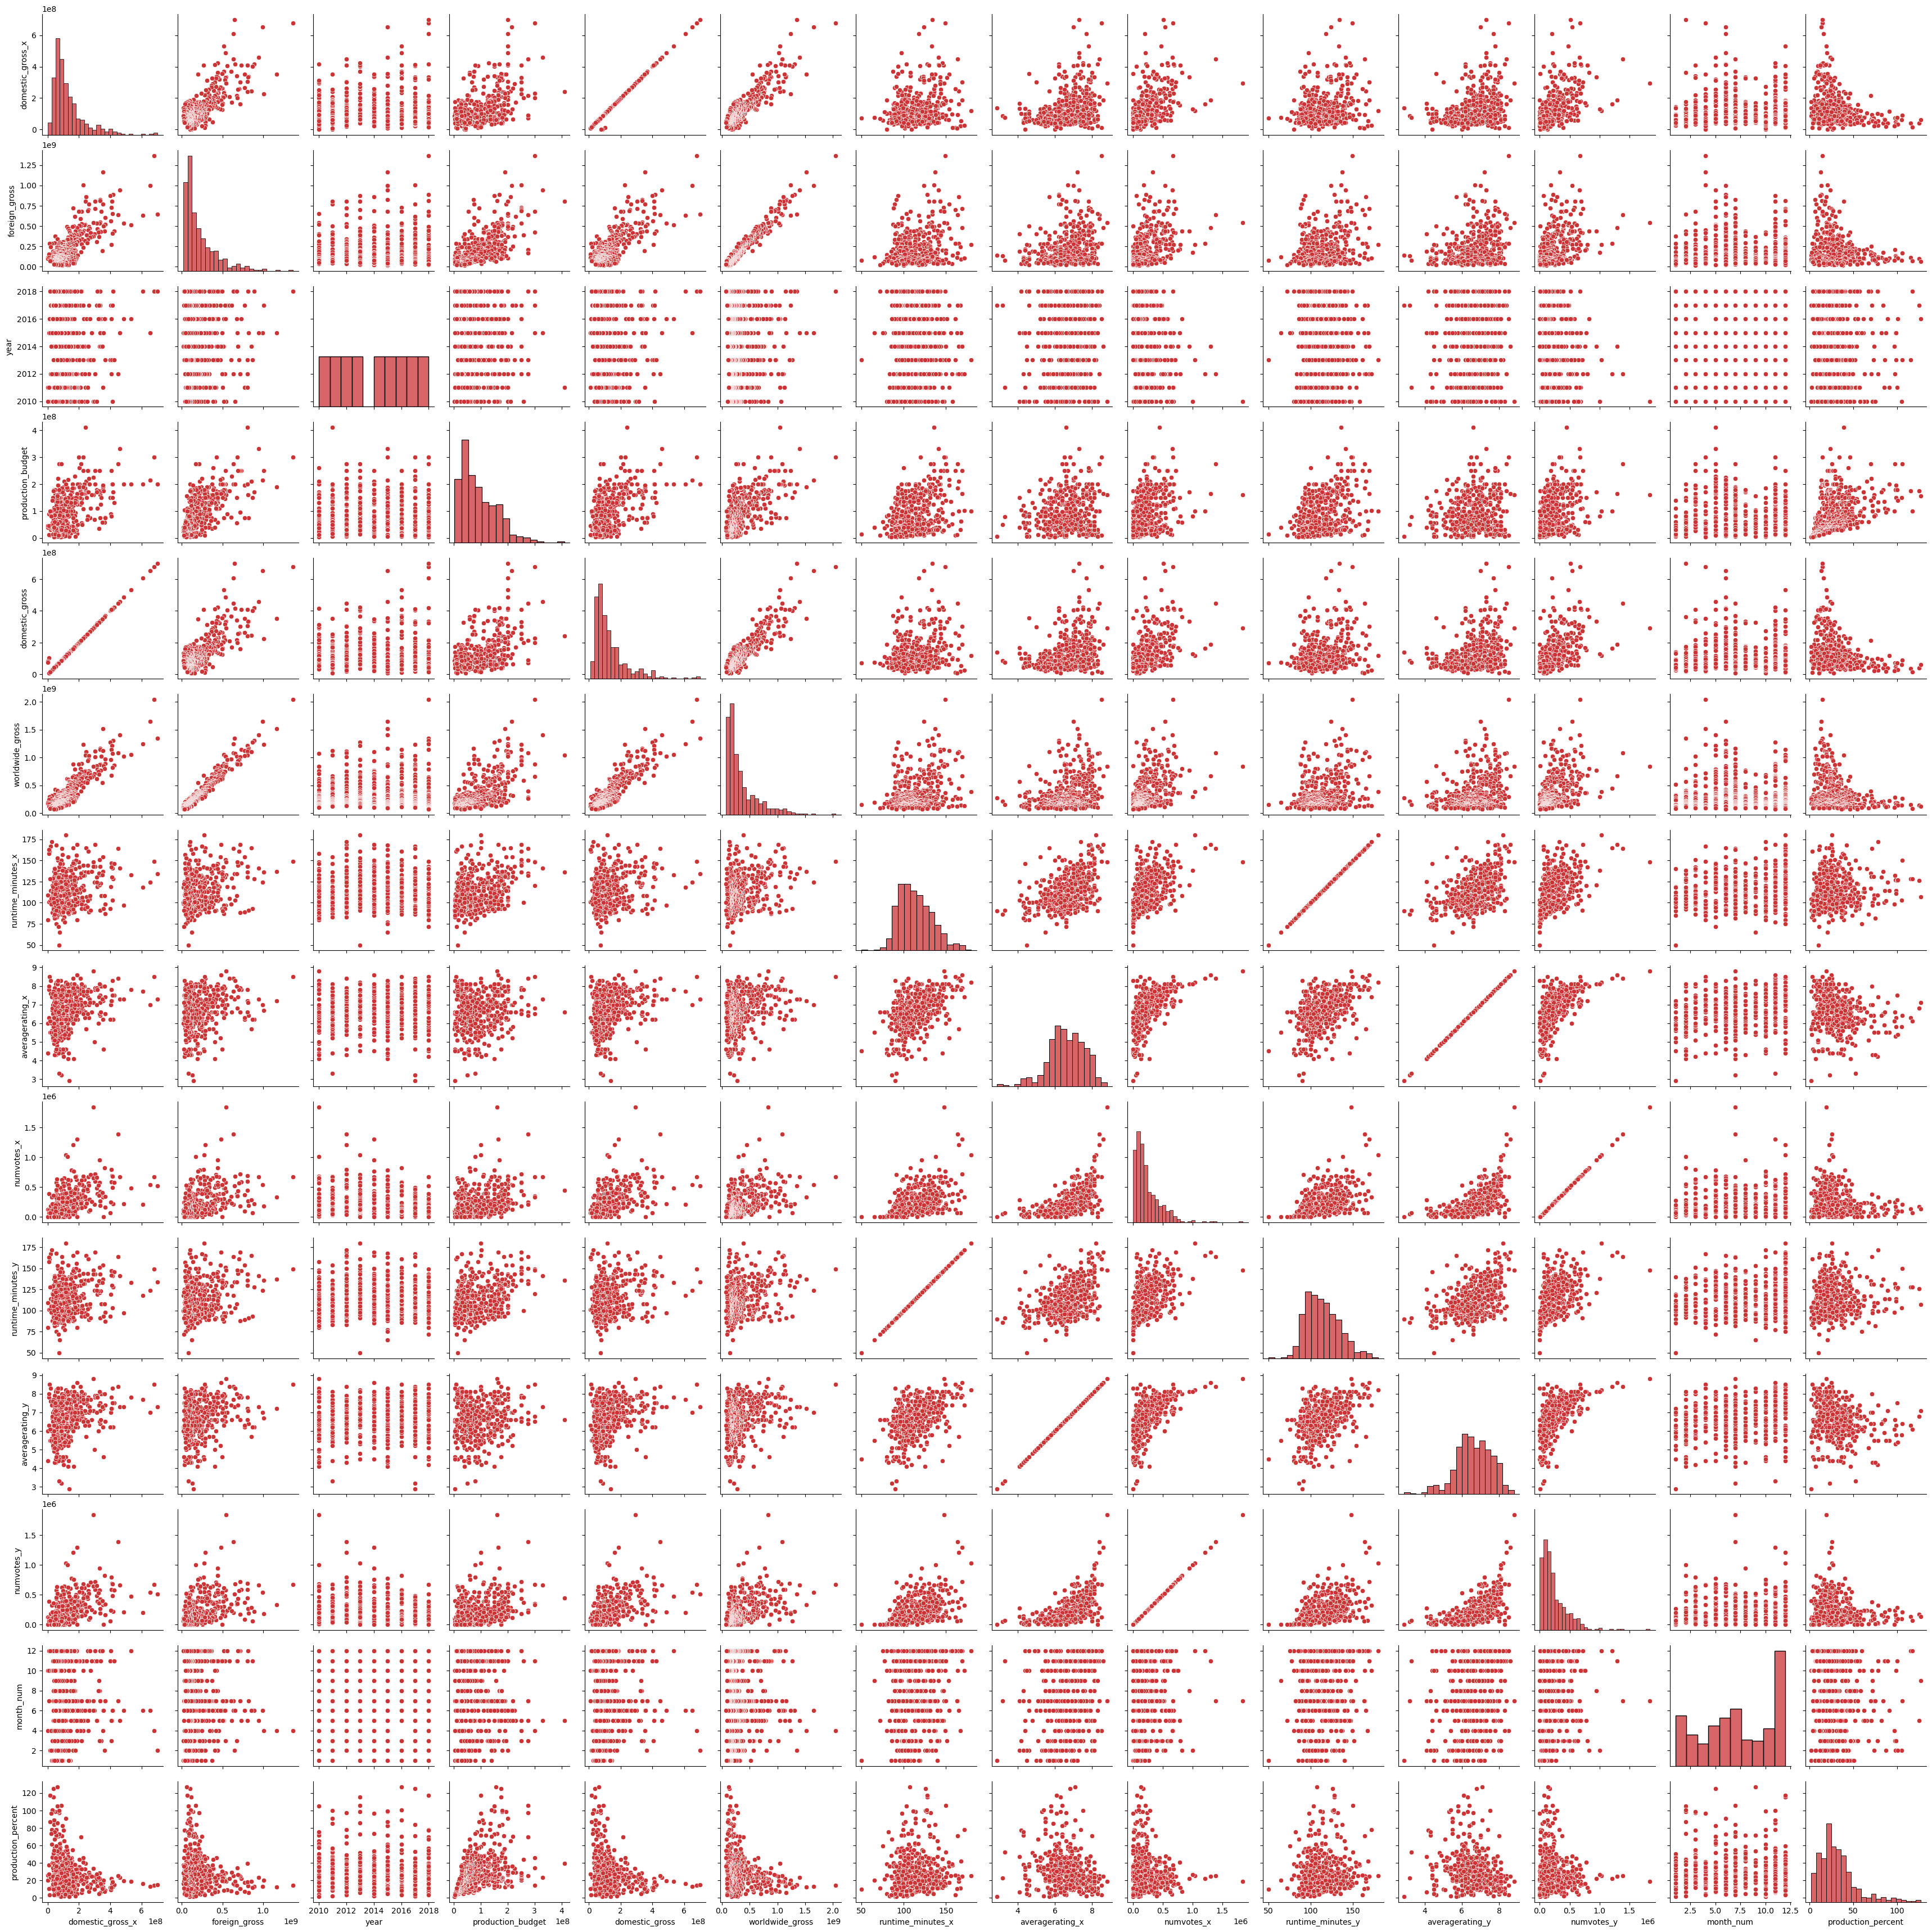

In [496]:
sns.pairplot(top_df)

plt.show()

<AxesSubplot:xlabel='worldwide_gross', ylabel='Count'>

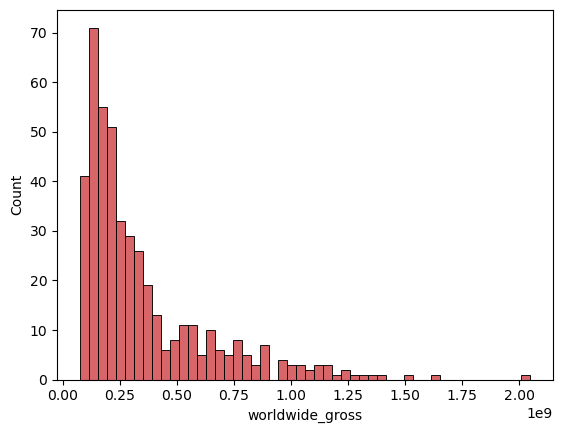

In [501]:
# creates a histogram of the 'worldwide_gross' column, with 50 bins to group the data. 
#This line plots the distribution of the total box office revenue earned by the top 50 films.

sns.histplot(top_df, x = 'worldwide_gross', bins = 50)

<AxesSubplot:xlabel='production_budget', ylabel='Count'>

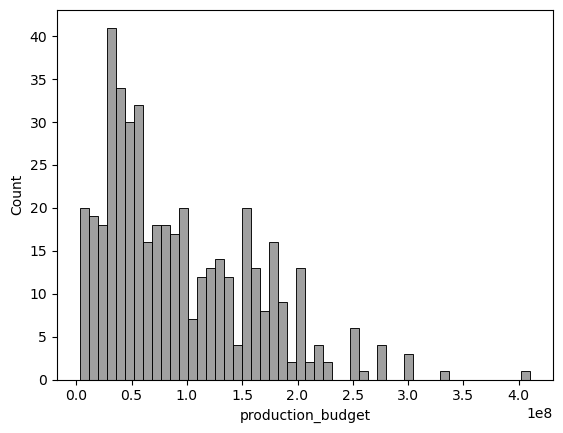

In [500]:
#The second line creates a histogram of the 'production_budget' column, also with 50 bins, 
#This line plots the distribution of the production costs for the top 50 films.

sns.histplot(top_df, x = 'production_budget', bins = 50, color = 'grey')

<AxesSubplot:xlabel='worldwide_gross', ylabel='Count'>

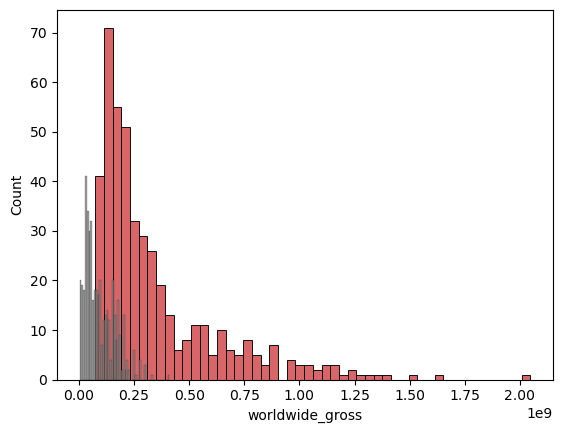

In [502]:
sns.histplot(top_df, x = 'worldwide_gross', bins = 50)
sns.histplot(top_df, x = 'production_budget', bins = 50, color = 'grey')

In [503]:
#Find the median and mean percentage production cost.

print("The median percentage of production costs for all films is", 
     int(round(top_df["production_percent"].median())), "percent.")

print("The mean percentage of production costs for all films is", 
     int(round(top_df["production_percent"].mean())), "percent.")


The median percentage of production costs for all films is 26 percent.
The mean percentage of production costs for all films is 32 percent.


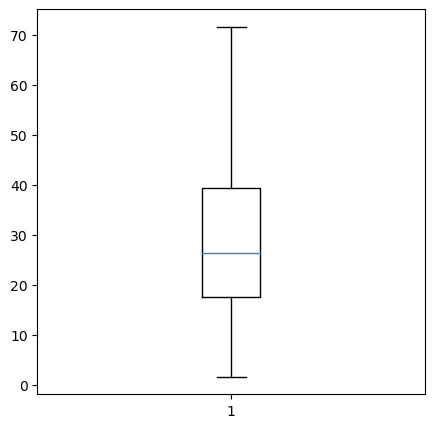

In [505]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(top_df['production_percent'], showfliers = False);


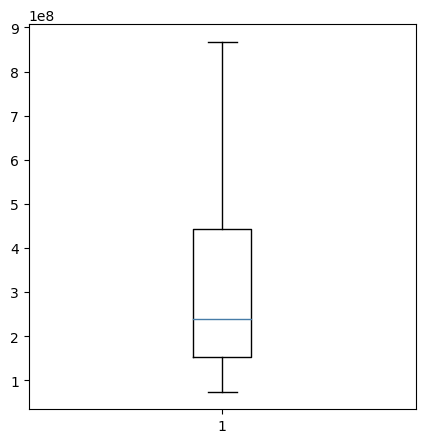

In [504]:
# Examine worldwide revenue median and ranges

fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(top_df['worldwide_gross'], showfliers = False);

In [506]:
# Create reference stat dataframe of costs and gross

top_df[['production_budget', 'domestic_gross', 'worldwide_gross', 
          'production_percent']].describe().astype(int)

,production_budget,domestic_gross,worldwide_gross,production_percent
count,450,450,450,450
mean,93217777,132092268,353442938,31
std,67813267,105363308,294687399,21
min,3000000,8178001,73866088,1
25%,40000000,63573607,153155012,17
50%,75000000,100269433,238949263,26
75%,140000000,162946882,443582754,39
max,410600000,700059566,2048134200,127


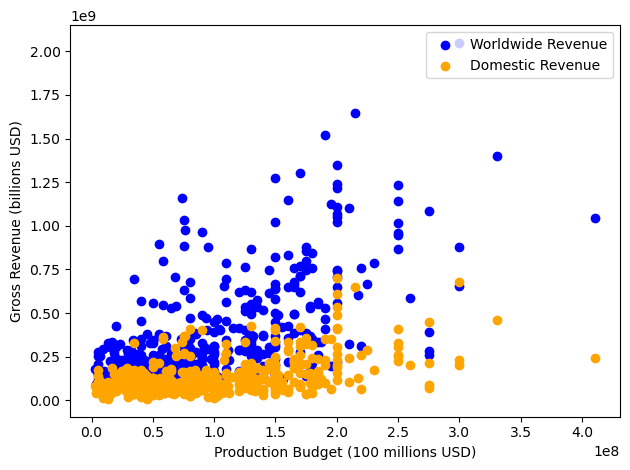

In [318]:

fig, ax = plt.subplots()

ax.scatter(top_df['production_budget'], top_df['worldwide_gross'],
            c ='blue')
ax.scatter(top_df['production_budget'], top_df['domestic_gross'],
            c ='orange')
    

ax.set_xlabel('Production Budget (100 millions USD)')
ax.set_ylabel('Gross Revenue (billions USD)')



ax.legend(['Worldwide Revenue', 'Domestic Revenue'], loc='upper right')
plt.tight_layout()

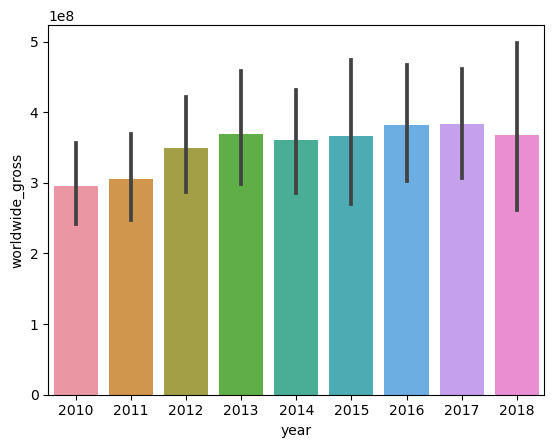

In [507]:
sns.barplot(x ='year', y = 'worldwide_gross', data = top_df);

In [508]:
top_df.columns

Index(['Movie_Title', 'studio', 'domestic_gross_x', 'foreign_gross', 'year',
       'production_budget', 'domestic_gross', 'worldwide_gross', 'movie_id_x',
       'runtime_minutes_x', 'genres_x', 'averagerating_x', 'numvotes_x',
       'primary_title_y', 'original_title_y', 'runtime_minutes_y', 'genres_y',
       'averagerating_y', 'numvotes_y', 'title', 'month_released', 'month_num',
       'production_percent'],
      dtype='object')

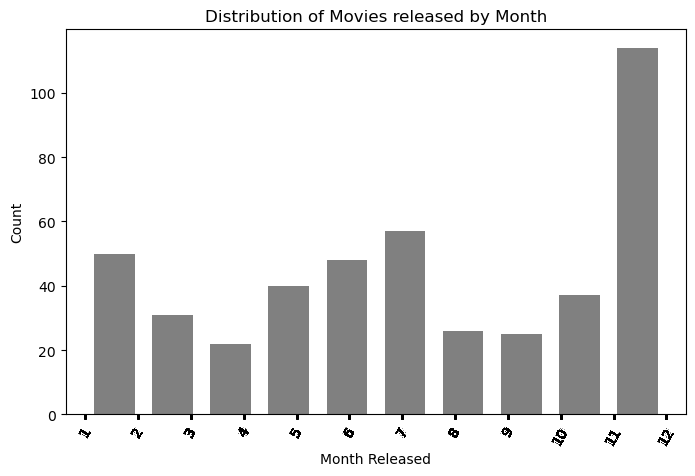

In [510]:
#Show histogram for which month films are released

fig, ax = plt.subplots(figsize = (8, 5))
ax.hist(top_df['month_num'], color='grey', rwidth = 0.7)
ax.set_xlabel('Month Released');
ax.set_ylabel('Count')
ax.set_title('Distribution of Movies released by Month')
plt.xticks(Merged_df['month_num'],
                   rotation=60);

In [511]:
top_df['month_released'].value_counts()

November     59
July         57
December     55
June         48
May          40
October      37
February     31
March        31
August       26
September    25
April        22
January      19
Name: month_released, dtype: int64

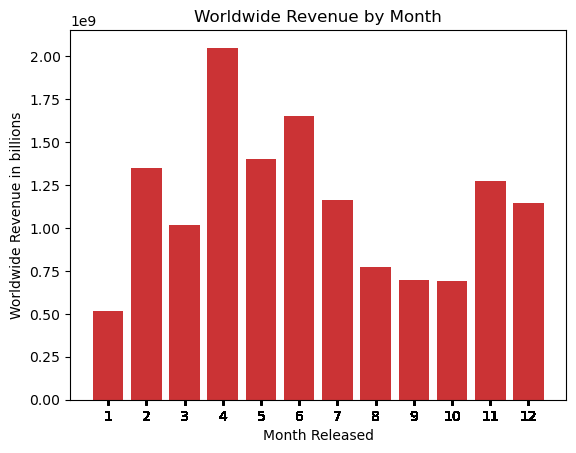

In [512]:
# Examine month released and their relationship to revenue.
fig, ax = plt.subplots()

plt.bar(top_df['month_num'], top_df['worldwide_gross'])

ax.set_xlabel('Month Released');
ax.set_ylabel('Worldwide Revenue in billions')
ax.set_title('Worldwide Revenue by Month')
plt.xticks(Merged_df['month_num']);

### Visual Summary on Movie Release

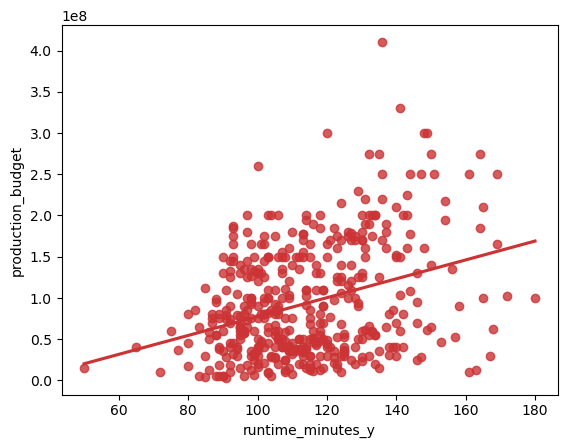

In [514]:
# Examine relationship between runtime minutes and production budget in 100 millions USD
sns.regplot(x = "runtime_minutes_y",
            y = "production_budget", 
            ci = None,
            data = top_df);

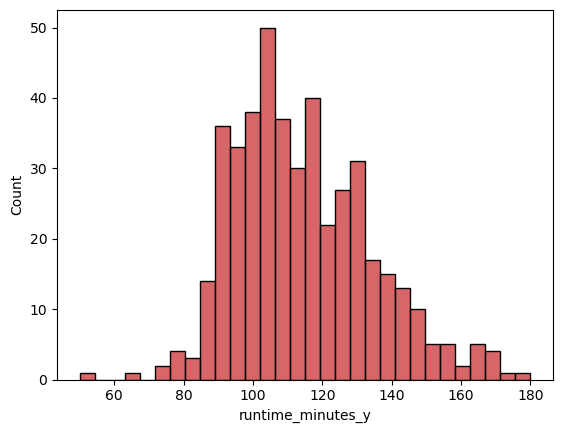

In [515]:
#Identify the peak movie runtime, use histogram

sns.histplot(top_df, x = 'runtime_minutes_y', bins = 30);

In [516]:

top_df.describe().astype(int)

,domestic_gross_x,foreign_gross,year,production_budget,domestic_gross,worldwide_gross,runtime_minutes_x,averagerating_x,numvotes_x,runtime_minutes_y,averagerating_y,numvotes_y,month_num,production_percent
count,450,450,450,450,450,450,450,450,450,447,450,450,450,450
mean,131524074,221350670,2014,93217777,132092268,353442938,114,6,238271,114,6,238271,7,31
std,105787307,204594244,2,67813267,105363308,294687399,19,0,223018,19,0,223018,3,21
min,25400,16100000,2010,3000000,8178001,73866088,50,2,6,50,2,6,1,1
25%,62525000,80887642,2012,40000000,63573607,153155012,99,6,89821,99,6,89821,5,17
50%,100200000,140218880,2014,75000000,100269433,238949263,111,6,167485,112,6,167485,7,26
75%,162950000,291295377,2016,140000000,162946882,443582754,127,7,329702,127,7,329702,11,39
max,700100000,1369318718,2018,410600000,700059566,2048134200,180,8,1841066,180,8,1841066,12,127


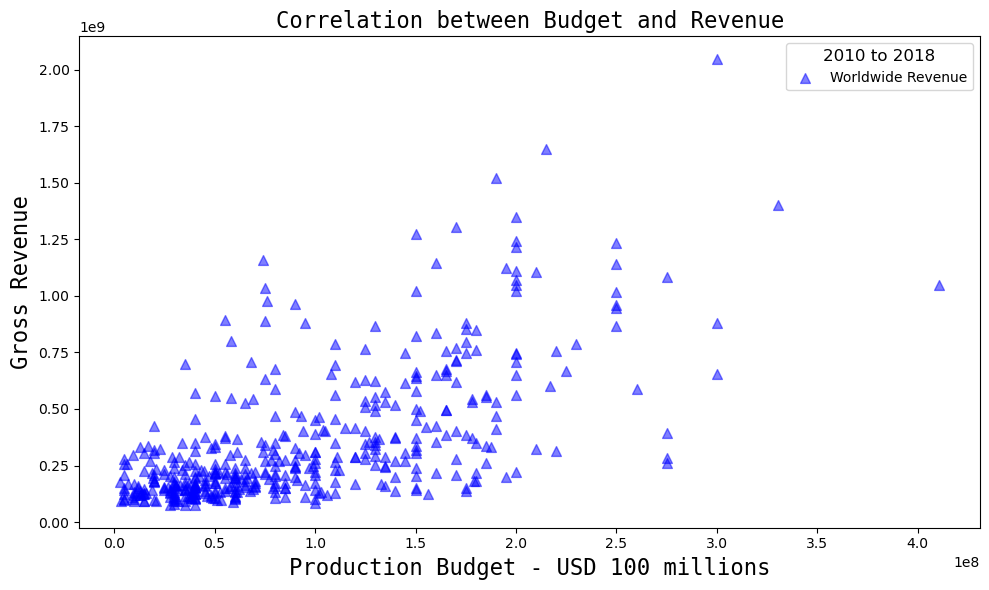

In [517]:
# Show relationship between production costs and revenue. Use scatterplot to show trend. 

fig, ax = plt.subplots(figsize=(10,6))


ax.scatter(top_df['production_budget'], top_df['worldwide_gross'],
            c ='blue',
            alpha=0.5,
            s=50,
            marker='^')



#set labels
plt.xlabel('Production Budget - USD 100 millions', size=16, family='monospace', weight=500)
plt.ylabel('Gross Revenue', size=16, family='monospace')
plt.title('Correlation between Budget and Revenue', size=16, 
          family='monospace', weight=500)


# Create Legend
ax.legend(['Worldwide Revenue', 'Domestic Revenue'], title = '2010 to 2018', 
          title_fontsize = "12",loc='upper right')

plt.tight_layout();



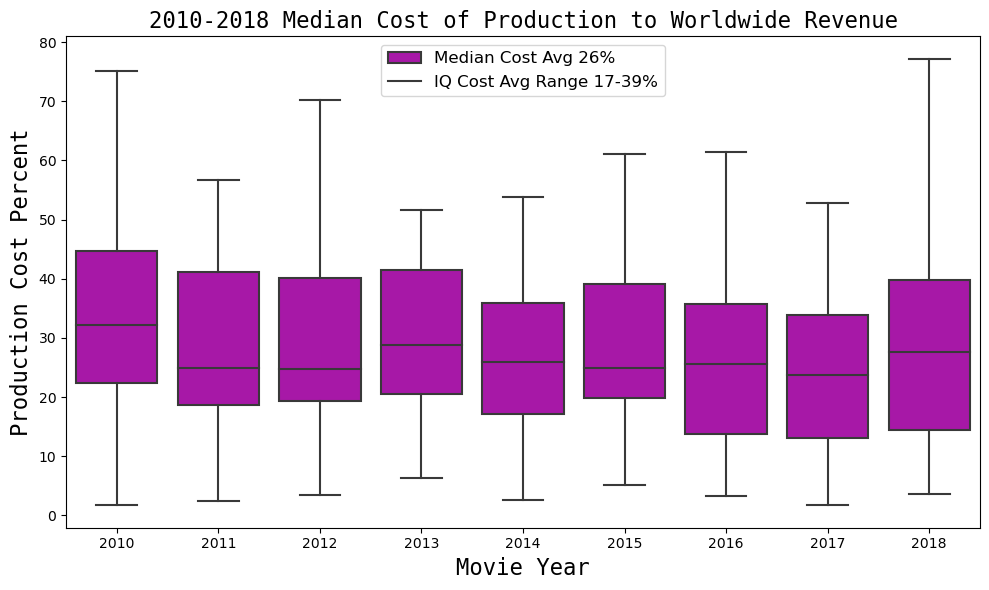

In [518]:
# Show the median and interquartile range of production budget percentages of worldwide gross

sns.set_palette("Set1", 8, .75)

plt.figure(figsize=(10,6))

box = sns.boxplot(x = top_df['year'], y = top_df['production_percent'], 
                  showfliers = False, color = 'm')


# Add labels and title

plt.xlabel('Movie Year', size=16, family='monospace', weight=500)
plt.ylabel('Production Cost Percent', size=16, family='monospace')
plt.title('2010-2018 Median Cost of Production to Worldwide Revenue', size=16, 
          family='monospace', weight=500)

# Add text box labeling median, IQ range for all years

plt.legend(['Median Cost Avg 26%', 'IQ Cost Avg Range 17-39%'], fontsize = "12", 
           loc='upper center')


plt.tight_layout();


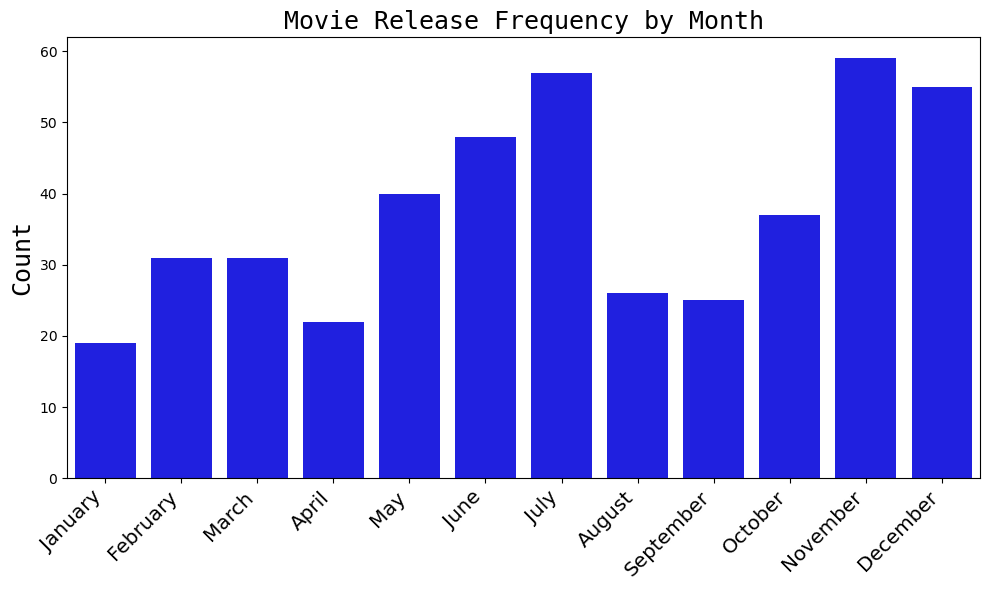

In [331]:
# Show most common months for movie release.


plt.figure(figsize=(10,6))


sns.countplot(x ='month_released', data = top_df, order = ['January', 'February',
                                                            'March', 'April', 'May',
                                                            'June', 'July', 'August',
                                                            'September', 'October',
                                                            'November', 'December'], 
              color = 'b')

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

#Set Title and Axes Labels

plt.xlabel(None)
plt.ylabel('Count', size=18, family='monospace')
plt.title('Movie Release Frequency by Month', size=18, family='monospace', weight=500)

plt.tight_layout();

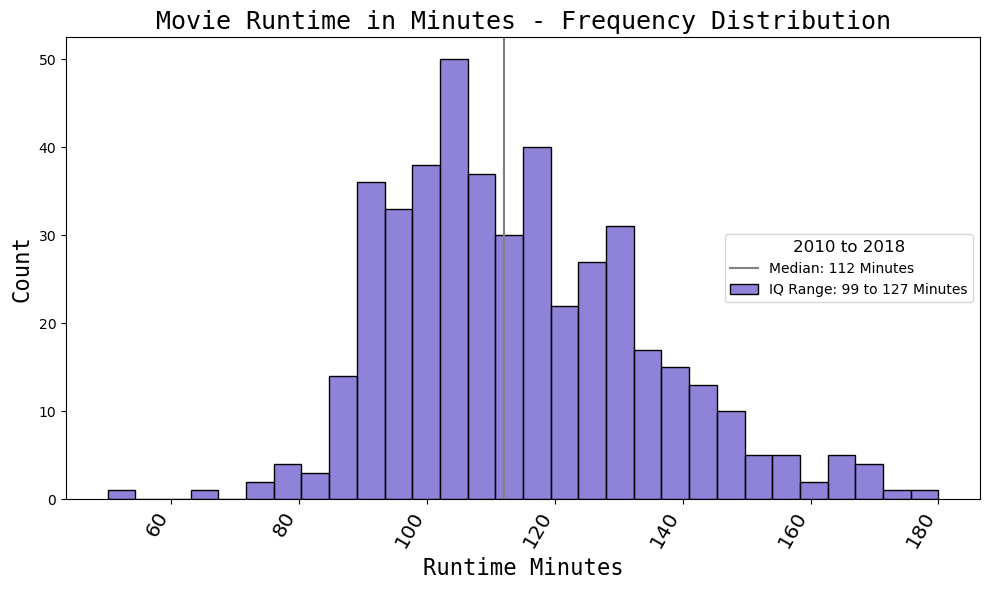

In [521]:
# Create one more visualization for runtime minutes 
plt.figure(figsize=(10,6))

sns.histplot(x ='runtime_minutes_y', data = top_df, bins = 30, color = 'slateblue')

plt.xticks(
    rotation=60, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

# Display median vertical line

plt.axvline(x=top_df.runtime_minutes_y.median(),
            color='grey')

# Label the axes 

plt.xlabel('Runtime Minutes', size=16, family='monospace', weight=500)
plt.ylabel('Count', size=16, family='monospace')
plt.title('Movie Runtime in Minutes - Frequency Distribution', size=18, 
          family='monospace', weight=500)

# Add detail

plt.legend(['Median: 112 Minutes', 'IQ Range: 99 to 127 Minutes'], title = '2010 to 2018', 
          title_fontsize = "12",loc='center right')

plt.tight_layout();


### Conclusions and Recommendation

In order to help Microsoft break into the movie business, this report merged three datasets to analyze the top 50 films from each year, 2010 to 2018. The analysis focused on production costs, revenue ranges, and factors that impact a film's success. The report recommends that Microsoft set aside a budget of at least USD 75 million per film to compete with other top films. Although Microsoft could start with lower budgets, it is important to have a cushion of funds available. Microsoft may have to spend more initially to establish relationships with directors, actors, distribution networks, and marketing structures. To expand returns on investment, worldwide releases are recommended. The report suggests developing three movie ideas to spread risk, although initial investments may be higher. A film should be released in May or June, which marks the beginning of the summer movie season. A runtime between 99 to 127 minutes is recommended, with longer runtimes for specific genres.

